In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [27]:
from mlxtend.feature_selection import SequentialFeatureSelector

ModuleNotFoundError: No module named 'mlxtend'

In [6]:
from sklearn.datasets import load_boston
boston = load_boston()

bos = pd.DataFrame(boston.data, columns=boston.feature_names)
bos['Price']=boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### RFE - Recursive Feature Elimination

In [8]:
y = bos['Price']
X = bos.drop('Price', axis=1)

In [10]:
model = LinearRegression()
rfe = RFE(model, 10)

In [18]:
X_rfe = rfe.fit_transform(X, y)
model.fit(X_rfe, y)

print(rfe.support_)
print(rfe.ranking_)
print(list(X.columns))

[ True  True  True  True  True  True False  True  True False  True False
  True]
[1 1 1 1 1 1 4 1 1 2 1 3 1]
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [20]:
## select the best number to keep in RFE
noof_cols = 13
score_list=[]
for n in range(noof_cols):
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                    test_size=0.3, random_state=42) 
    model = LinearRegression()
    rfe = RFE(model, n+1)
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe, y_train)
    score = model.score(X_test_rfe, y_test)
    score_list.append(score)

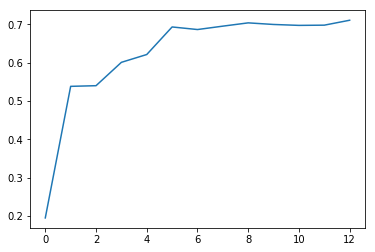

In [21]:
plt.plot(score_list)
plt.show()

In [24]:
score_list

[0.1948071974674822,
 0.5383400514112333,
 0.5400333283802863,
 0.6010204760064425,
 0.6214376494593692,
 0.6933883022243372,
 0.686656193575295,
 0.6955103666655819,
 0.7040715873157541,
 0.6998923156054497,
 0.6974987711286378,
 0.6980807084486815,
 0.7109203586326287]

In [25]:
cols = X.columns
model = LinearRegression()
rfe = RFE(model, 9)
X_rfe = rfe.fit_transform(X, y)
model.fit(X_rfe, y)
temp = pd.Series(rfe.support_, index=cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT'], dtype='object')
